In [17]:
files = ['Bilbao', 'Madrid', 'National_flipout', 'National_whole', 'National_no_NonRenew', 'National_no_NonRenew_flipout']

In [18]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('darkgrid')

### data

In [19]:
predicts = { f:pickle.load(open(f'./pickle/{f}_predict.pkl', 'rb')) for f in files}

In [20]:
p, q, x, y, m, b = predicts['National_no_NonRenew'], predicts['National_no_NonRenew_flipout'], predicts['National_whole'], predicts['National_flipout'],  predicts['Madrid'], predicts['Bilbao']

In [7]:
p.shape # (x1000) eol, solar, hydro, oth (x10 rep)

(1000, 4, 10)

In [8]:
to_df = []
for i,a in enumerate(p[:14*24,:,:]): # only first week
    for j,b in enumerate(a):
        for k, c in enumerate(b):
            to_df.append([i,j,k,c])

In [9]:
dfp = pd.DataFrame(to_df, columns=['forecast','type', 'iter', 'value'])
dfp.type = dfp.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfp

,forecast,type,iter,value
0,0,solar,0,0.618391
1,0,solar,1,0.273674
2,0,solar,2,0.455968
3,0,solar,3,-0.010425
4,0,solar,4,0.695448
...,...,...,...,...
13435,335,other,5,0.941640
13436,335,other,6,0.761767
13437,335,other,7,0.801755
13438,335,other,8,0.587365


### plots

In [10]:
sns.set(rc={'figure.figsize':(15,6)})

In [142]:
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'solar'])
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'hydro'])
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'wind'])

<AxesSubplot:xlabel='forecast', ylabel='value'>

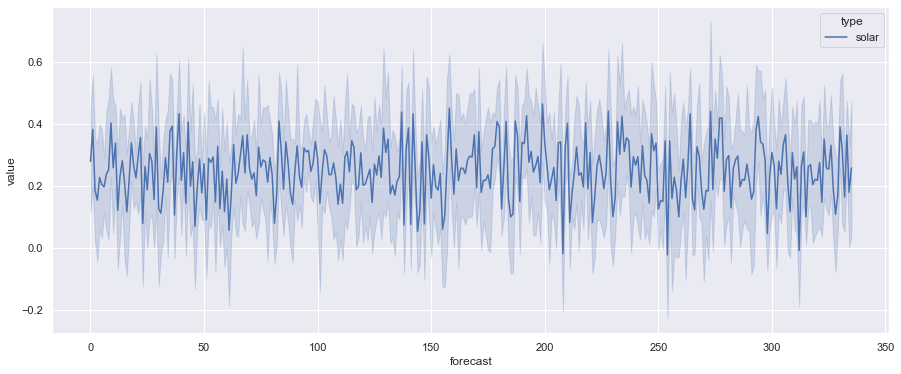

In [11]:
sns.lineplot(x="forecast", y="value", hue="type", data=dfp[(dfp.type == 'Bilbao') | (dfp.type == 'solar')], )

In [144]:
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[(dfp.type == 'hydro') | (dfp.type == 'wind')], )

### mse

In [24]:
y_true = pickle.load(open(f'./pickle/National_flipout_true.pkl', 'rb'))

array([[0.00483425, 0.36226643, 0.4240078 , 0.78991597],
       [0.54091851, 0.29001981, 0.22682955, 0.56302521],
       [0.44354282, 0.4250409 , 0.27890571, 0.6302521 ],
       ...,
       [0.15607735, 0.27348661, 0.44230328, 0.86554622],
       [0.28349448, 0.81150435, 0.38713008, 0.90756303],
       [0.01691989, 0.48170154, 0.75751319, 0.80672269]])

In [13]:
y_pred = np.median(p, axis=-1)

In [14]:
mse = (np.square(y_true - y_pred)).mean()

In [15]:
mse**(1/2)

0.21517293598733064

### violin

In [16]:
b, m = np.median(predicts['Bilbao'], axis=-1), np.median(predicts['Madrid'], axis=-1)

In [17]:
b[0]

array([0.28525569, 0.41507538, 0.02836292, 0.82562983])

In [33]:
m[0]

array([[-0.19346827,  0.78813346,  0.26570822,  0.73292594,  0.03561812,
         0.83258946,  0.89379567, -0.13997677,  0.63937121,  0.37448286],
       [ 0.53406318,  0.03057033,  0.31605877,  0.43709295,  0.36094673,
         0.5084811 ,  0.38835   ,  0.37793458,  0.64499945,  0.23244938],
       [ 0.28405432,  0.52748067,  0.22054984,  0.23664021, -0.09884081,
         0.42823007,  0.15247221,  0.57322739,  0.11620548,  0.1699863 ],
       [ 0.78584504,  0.76531942,  0.69657821,  0.67310428,  0.81519638,
         0.79971809,  0.75402472,  0.80085502,  0.90314842,  0.78796903]])

In [18]:
dfb = pd.DataFrame([[t,e,v] for t,q in enumerate(b) for e,v in enumerate(q) ], columns=['forecast', 'type', 'value'])
dfb.type = dfb.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfb['city'] = 'Bilbao'

In [19]:
dfm = pd.DataFrame([[t,e,v] for t,q in enumerate(b) for e,v in enumerate(q) ], columns=['forecast', 'type', 'value'])
dfm.type = dfm.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfm['city'] = 'Madrid'

In [20]:
stk = pd.concat([dfb,dfm],ignore_index=True)

<AxesSubplot:xlabel='type', ylabel='value'>

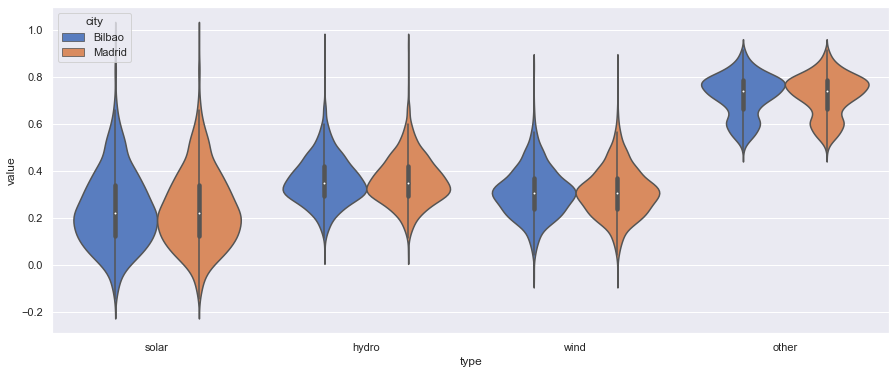

In [21]:
sns.violinplot(x="type", y="value", hue="city", data=stk, palette="muted")

In [21]:
y_true1, y_true2, y_true3, y_true4 = pickle.load(open(f'./pickle/National_no_NonRenew_true.pkl', 'rb')), pickle.load(open(f'./pickle/National_flipout_true.pkl', 'rb')), pickle.load(open(f'./pickle/Madrid_true.pkl', 'rb')), pickle.load(open(f'./pickle/Bilbao_true.pkl', 'rb'))

In [22]:
y_predN, y_predNF, y_predNR, y_predNRF, y_predMD, y_predBB = np.median(p, axis=-1), np.median(q, axis=-1), np.median(x, axis=-1), np.median(y, axis=-1), np.median(m, axis=-1), np.median(b, axis=-1)

In [23]:
mse1, mse2, mse3, mse4, mse5, mse6 = (np.square(y_true1 - y_predN)).mean(), (np.square(y_true1 - y_predNF)).mean(), (np.square(y_true2 - y_predNR)).mean(), (np.square(y_true2 - y_predNRF)).mean(), (np.square(y_true3 - y_predMD)).mean(), (np.square(y_true4 - y_predBB)).mean()

In [35]:
mse1**(1/2)

0.1864941254234031

In [28]:
mse2**(1/2)

0.21476625009388375

In [29]:
mse3**(1/2)

0.23544139723306304

In [30]:
mse4**(1/2)

0.21517293598733064

In [31]:
mse5**(1/2)

0.1913021305405035

In [34]:
mse6**(1/2)

0.18632924229953365